ImageNet veriseti ile eğitilmiş model ve ağırlıkları yükleniyor...

In [11]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

In [12]:
model = ResNet50(weights="imagenet")

Resmi girişe uygun formata getirmek için yeniden boyutlandırma fonksiyonu tanımlanıyor

In [13]:
def prepare_image(image, target):
	# giriş görüntüsünü yeniden boyutlandırma ve ön işlemerin yapılması
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# işlenmiş görüntüyü alma
	return image

Sınıflandırmak istenilen resmin web adresi aşağıdaki giirş alanına girilir

In [45]:
#@title Default title text { vertical-output: true }
ImageURL = input() #@param {type:"string"}

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdD6_FNUaL9Cs4xcX5ysYIkhqCTt3Q-Lq89IwUMzAMGtzHa8KyzL8PkWQBkBPUDeSuz5Y&usqp=CAU


Girilen web adresinden resim indiriliyor

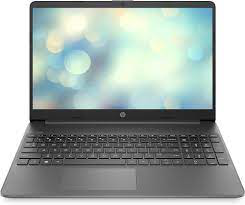

In [46]:
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

Eğitilmiş model ile sınıflandırma yapılıyor

In [47]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 boyutlu hale getir

preds = model.predict(pre_image) # Kesirim modeline ön işlemden geçmiş görüntüyü uygula

results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet veri kümseinden etiket, olasılık ve kestrim sonucunu al
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

1/1 [==============================] - 0s 98ms/step
{'success': True, 'predictions': [{'label': 'notebook', 'probability': 0.7876238226890564}, {'label': 'laptop', 'probability': 0.15540353953838348}, {'label': 'space_bar', 'probability': 0.019918303936719894}, {'label': 'desktop_computer', 'probability': 0.014717275276780128}, {'label': 'mouse', 'probability': 0.005564943887293339}]}


In [49]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 
# En yüksek olasılıklı sonucu ekrana yazdır

Sınıflandırma tahmini en yüksek olan 0.7876238226890564 oranıyla notebook'dır.
